##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importing the Data files

In [ ]:
df_acc = pd.read_csv('/content/all_accelerometer_data_pids_13.csv')
df_clean = pd.read_csv('/content/CLEAN_TAC.csv')
df_phone = pd.read_csv('/content/phone_types.csv')

Accelerometer data which contain data from different mobile phones,cleantac data containing all the tac values for every mobile, phone type data contains all the phone types based on their PID's

In [ ]:
df_acc

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


Combining Accelerometer data with phone type data where it matches with their respective pid's

In [ ]:
df_acc = pd.merge(df_acc,df_phone,on=['pid'])
df_acc

,time,pid,x,y,z,phonetype
0,0,JB3156,0.000000,0.000000,0.000000,Android
1,1493739732016,JB3156,-2.556815,8.312009,14.090558,Android
2,1493739732035,JB3156,-2.499538,8.636412,13.906186,Android
3,1493739732055,JB3156,-2.471458,8.687223,13.677473,Android
4,1493739732075,JB3156,-2.244561,8.832140,13.288850,Android
...,...,...,...,...,...,...
14057562,1493809885629,DK3500,-0.000800,0.000500,0.006300,iPhone
14057563,1493809885654,DK3500,0.001000,-0.000300,0.006100,iPhone
14057564,1493809885679,DK3500,-0.000200,-0.000100,0.006300,iPhone
14057565,1493809885705,DK3500,-0.001100,0.000100,0.006700,iPhone


##Visualizations

**Generating a Bar plot displaying the counts of unique PIDs from a DataFrame, with customized formatting for the y-axis tick labels.**

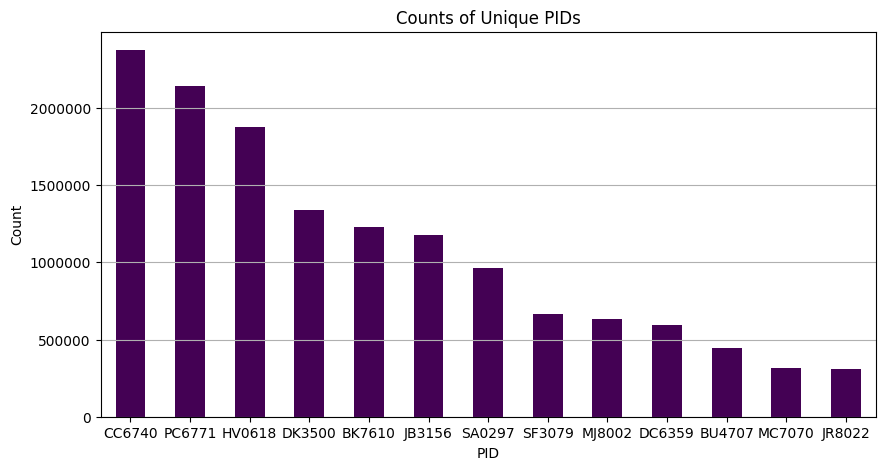

In [ ]:
import matplotlib.ticker as ticker
pid_counts = df_acc['pid'].value_counts()
plt.figure(figsize=(10, 5))
pid_counts.plot(kind='bar',colormap='viridis')
plt.title('Counts of Unique PIDs')
plt.xlabel('PID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

The bar chart displays the counts of unique PIDs, highlighting CC6740 as the most frequent with over 2,000,000 instances, followed by PC6771 and HV0618 with nearly 2,000,000 and 1,800,000 counts, respectively. Other PIDs like DK3500 and BK7610 have counts around 1,500,000 and 1,300,000, while the least frequent, JR8022, has around 500,000. This indicates a substantial variation in the prevalence of these PIDs, suggesting differing levels of product popularity or availability.

**Generating a Bar plot displaying the counts of unique phone types from a DataFrame, with customized formatting for the y-axis tick labels and using the 'Set3' colormap for color consistency.**

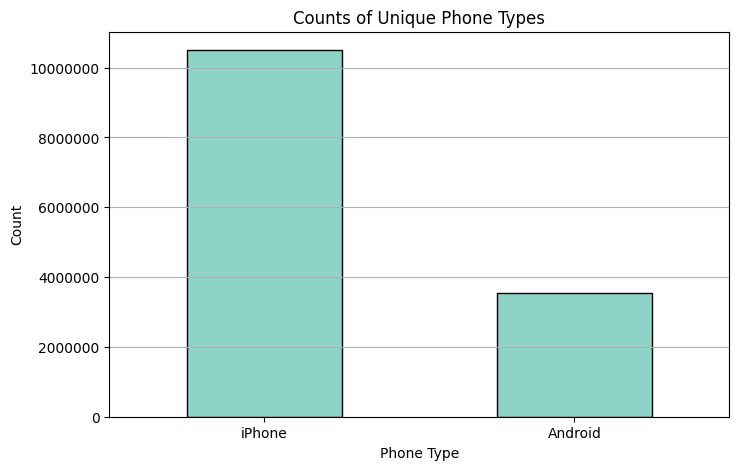

In [ ]:
phonetype_counts = df_acc['phonetype'].value_counts()
plt.figure(figsize=(8, 5))
phonetype_counts.plot(kind='bar',colormap='Set3',edgecolor='black')
plt.title('Counts of Unique Phone Types')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

The bar chart shows that the count of iPhone users exceeds 10,000,000, which is significantly higher than the count of Android users, who are just above 4,000,000. This indicates a much larger user base for iPhones compared to Androids.

**Generating a stacked bar plot representing the frequency distribution of phone types for each PID in the DataFrame, with customized formatting for the y-axis tick labels and legend, and a rotated x-axis label for better readability.**

<Figure size 800x500 with 0 Axes>

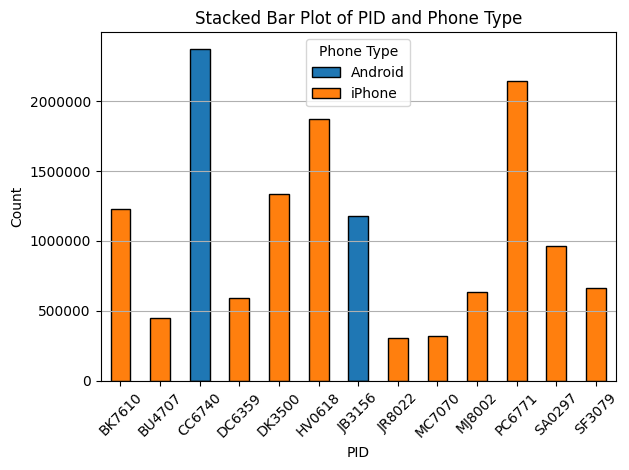

In [ ]:
contingency_table = df_acc.groupby(['pid', 'phonetype']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 5))
contingency_table.plot(kind='bar', stacked=True,edgecolor='black')
plt.title('Stacked Bar Plot of PID and Phone Type')
plt.xlabel('PID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Phone Type')
plt.grid(axis= 'y')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

The stacked bar chart illustrates the counts of various PIDs (Product IDs) segmented by phone type, either Android or iPhone. It shows that most PIDs, such as BK7610, DK3500, HV0618, JB3156, PC6771, SA0297, and SF3079, are predominantly used by iPhone users, indicating a higher prevalence of iPhone usage. Notably, only PIDs CC6740 and DC6359 have significant counts for Android users, with CC6740 being the most prominent among them. Some PIDs, including BU4707, JR8022, MC7070, and MJ8002, exhibit relatively balanced usage between Android and iPhone, although iPhone generally remains higher. Overall, the chart suggests that while iPhone is the dominant phone type for most PIDs, certain PIDs have more balanced or Android-preferred usage.

**Creating a new column 'timestamp' in the DataFrame 'df_acc', where the time values from the 'time' column, originally in milliseconds, are converted to seconds by integer division by 1000.**

In [ ]:
df_acc['timestamp'] = df_acc['time']//1000
df_acc

,time,pid,x,y,z,phonetype,timestamp
0,0,JB3156,0.000000,0.000000,0.000000,Android,0
1,1493739732016,JB3156,-2.556815,8.312009,14.090558,Android,1493739732
2,1493739732035,JB3156,-2.499538,8.636412,13.906186,Android,1493739732
3,1493739732055,JB3156,-2.471458,8.687223,13.677473,Android,1493739732
4,1493739732075,JB3156,-2.244561,8.832140,13.288850,Android,1493739732
...,...,...,...,...,...,...,...
14057562,1493809885629,DK3500,-0.000800,0.000500,0.006300,iPhone,1493809885
14057563,1493809885654,DK3500,0.001000,-0.000300,0.006100,iPhone,1493809885
14057564,1493809885679,DK3500,-0.000200,-0.000100,0.006300,iPhone,1493809885
14057565,1493809885705,DK3500,-0.001100,0.000100,0.006700,iPhone,1493809885


Creating a subset DataFrame named 'df_sub' containing only the rows where the 'pid' column equals 'BK7610'.

In [ ]:
df_sub = df_acc[df_acc['pid']=='BK7610']
df_sub.head()

,time,pid,x,y,z,phonetype,timestamp
6657046,1493735870653,BK7610,0.1261,-0.0078,-0.0243,iPhone,1493735870
6657047,1493735870679,BK7610,0.1336,-0.0697,-0.0446,iPhone,1493735870
6657048,1493735870703,BK7610,0.1443,-0.0474,-0.0447,iPhone,1493735870
6657049,1493735870729,BK7610,0.1255,-0.0038,0.0111,iPhone,1493735870
6657050,1493735870753,BK7610,0.1076,0.0032,0.0276,iPhone,1493735870


Creating a subset DataFrame named 'df_cleansub' containing only the rows where the 'pid' column equals 'BK7610'.

In [ ]:
df_cleansub = df_clean[df_clean['pid']=='BK7610']
df_cleansub.head()

,timestamp,TAC_Reading,pid
0,1493718714,-0.000482,BK7610
1,1493720697,0.001573,BK7610
2,1493721027,0.002144,BK7610
3,1493721357,0.000877,BK7610
4,1493721686,-0.001145,BK7610


Merging two DataFrames, 'df_sub' and 'df_cleansub', on the columns 'timestamp' and 'pid', retaining only the rows that have matching values in both DataFrames.

In [ ]:
df_merge = pd.merge(df_sub,df_cleansub,on=['timestamp','pid'],how='inner')
df_merge.head()

,time,pid,x,y,z,phonetype,timestamp,TAC_Reading
0,1493737046023,BK7610,0.1410,-0.2686,-0.1372,iPhone,1493737046,0.065357
1,1493737046063,BK7610,0.1714,-0.2722,-0.1208,iPhone,1493737046,0.065357
2,1493737046073,BK7610,0.3328,-0.1353,-0.2548,iPhone,1493737046,0.065357
3,1493737046101,BK7610,0.2822,-0.0375,-0.2816,iPhone,1493737046,0.065357
4,1493737046134,BK7610,0.1847,0.1813,-0.2680,iPhone,1493737046,0.065357


 Generating a subplot with four individual plots, each representing a time series: 'x', 'y', and 'z' accelerometer readings, and 'TAC_Reading', with corresponding timestamps, gridlines, and customized colors for each plot.

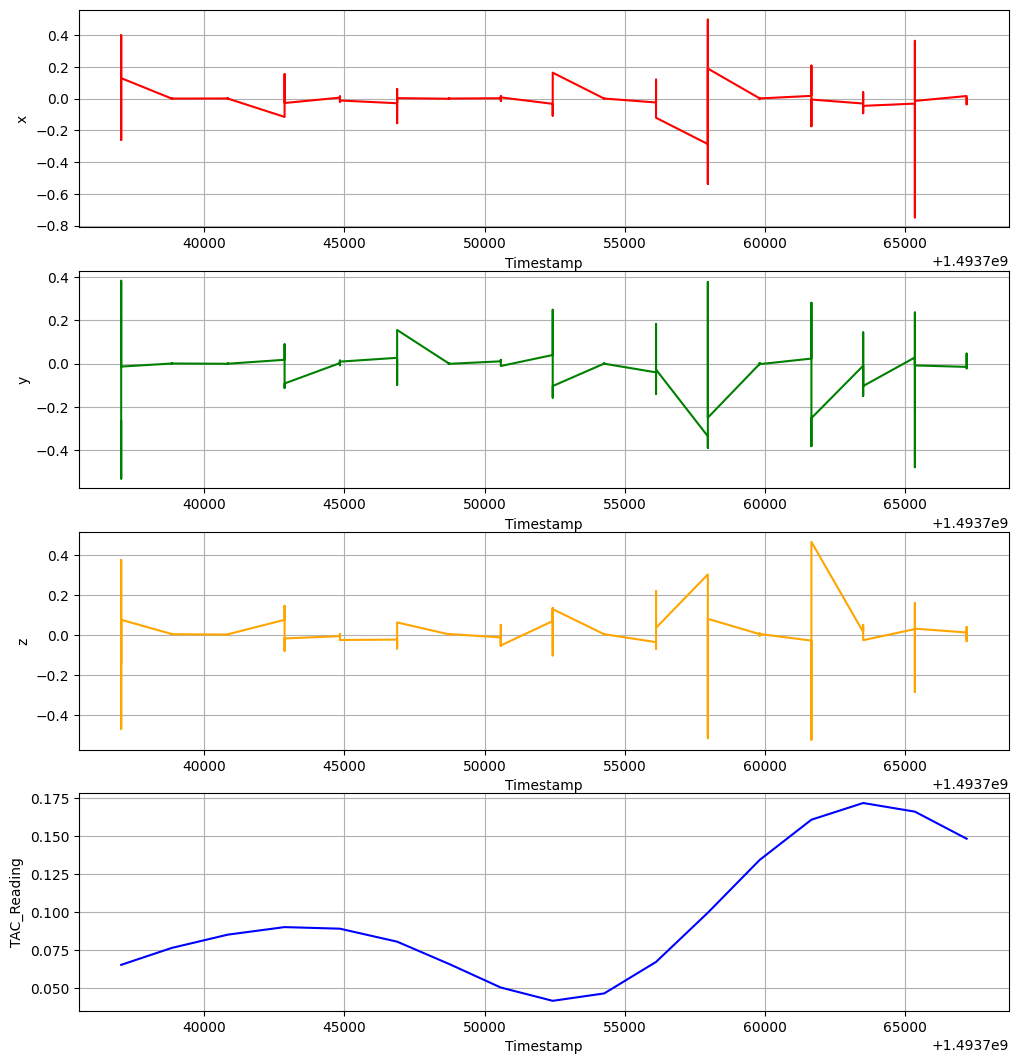

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 13))
axs[0].plot(df_merge['timestamp'],df_merge['x'], label='Time Series with x',color='red')
axs[0].set_xlabel("Timestamp")
axs[0].set_ylabel("x")
axs[0].grid(True)
axs[1].plot(df_merge['timestamp'],df_merge['y'], label='Time Series with y',color='green')
axs[1].set_xlabel("Timestamp")
axs[1].set_ylabel("y")
axs[1].grid(True)
axs[2].plot(df_merge['timestamp'],df_merge['z'], label='Time Series with z',color='orange')
axs[2].set_xlabel("Timestamp")
axs[2].set_ylabel("z")
axs[2].grid(True)
axs[3].plot(df_merge['timestamp'],df_merge['TAC_Reading'], label='Time Series with TAC readings',color='blue')
axs[3].set_xlabel("Timestamp")
axs[3].set_ylabel("TAC_Reading")
axs[3].grid(True)
plt.show()


The multi-line chart displays data over time, segmented into four distinct plots. The first three plots show the x, y, and z coordinates (in red, green, and orange respectively) of some measured values across a series of timestamps. Each coordinate exhibits fluctuations around the zero mark, with occasional peaks and troughs. The x-coordinate shows more pronounced variability compared to the y and z coordinates. The fourth plot represents the "TAC_Reading" (in blue), which trends upward over time, reaching a peak towards the end of the observed period. This suggests that while the individual coordinates have more erratic changes, the overall trend of the TAC_Reading indicates a steady increase over the same timeframe.

**creating an array 'd' representing the time axis for the accelerometer data in 'df_merge', assuming a sampling rate of 40 Hz, by dividing the index of the 'x' column by 40**

In [ ]:
d=np.arange(df_merge['x'].size)/40
df_merge['time_indices']=d
df_merge.head()

,time,pid,x,y,z,phonetype,timestamp,TAC_Reading,time_indices
0,1493737046023,BK7610,0.1410,-0.2686,-0.1372,iPhone,1493737046,0.065357,0.000
1,1493737046063,BK7610,0.1714,-0.2722,-0.1208,iPhone,1493737046,0.065357,0.025
2,1493737046073,BK7610,0.3328,-0.1353,-0.2548,iPhone,1493737046,0.065357,0.050
3,1493737046101,BK7610,0.2822,-0.0375,-0.2816,iPhone,1493737046,0.065357,0.075
4,1493737046134,BK7610,0.1847,0.1813,-0.2680,iPhone,1493737046,0.065357,0.100


plotting the same four time series data as before, where the x-axis represents time in seconds using the 'd' array.

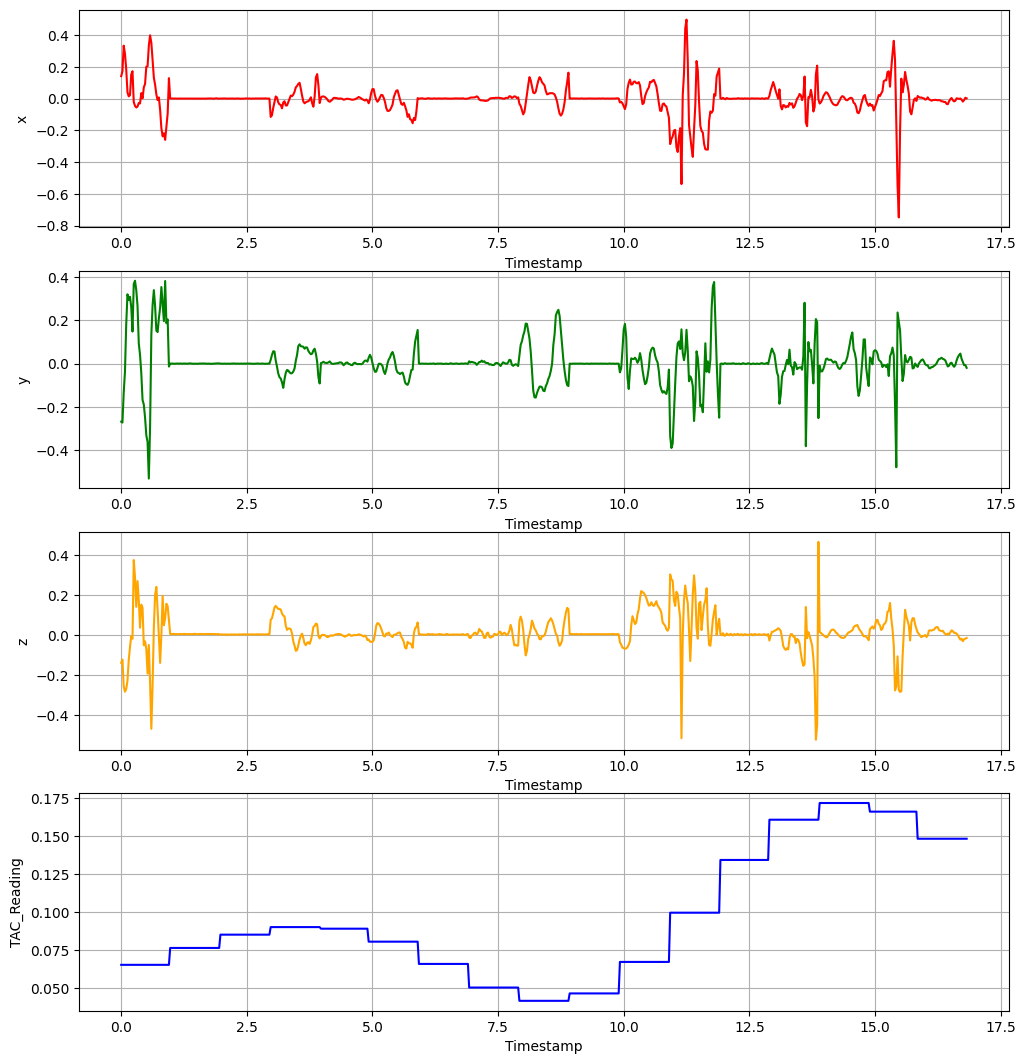

In [ ]:
fig,axs=plt.subplots(4,1,figsize=(12,13))
axs[0].plot(d,df_merge['x'],label='Time Series with x',color='red')
axs[0].set_xlabel("Timestamp")
axs[0].set_ylabel("x")
axs[0].grid(True)
axs[1].plot(d,df_merge['y'], label='Time Series with y',color='green')
axs[1].set_xlabel("Timestamp")
axs[1].set_ylabel("y")
axs[1].grid(True)
axs[2].plot(d,df_merge['z'], label='Time Series with z',color='orange')
axs[2].set_xlabel("Timestamp")
axs[2].set_ylabel("z")
axs[2].grid(True)
axs[3].plot(d,df_merge['TAC_Reading'], label='Time Series with TAC readings',color='blue')
axs[3].set_xlabel("Timestamp")
axs[3].set_ylabel("TAC_Reading")
axs[3].grid(True)
plt.show()

The multi-line chart shows the x, y, and z coordinates (in red, green, and orange) fluctuating over time from 0 to 17.5, with the x-coordinate showing significant variability, particularly around timestamps 0, 10, and 15. The y and z coordinates exhibit less pronounced but similar variability. The "TAC_Reading" (in blue) follows a step-like increasing trend, starting near zero and reaching around 0.15 by the end, indicating a steady rise. Overall, the chart highlights erratic behavior in the coordinates alongside a consistent increase in the TAC reading.

Creating a new DataFrame 'df_subset' containing only the columns 'time_indices', 'x', 'y', 'z', and 'TAC_Reading' from the merged DataFrame 'df_merge'.

In [ ]:
df_subset = df_merge[['time_indices','x','y','z','TAC_Reading']]
df_subset.head()

,time_indices,x,y,z,TAC_Reading
0,0.000,0.1410,-0.2686,-0.1372,0.065357
1,0.025,0.1714,-0.2722,-0.1208,0.065357
2,0.050,0.3328,-0.1353,-0.2548,0.065357
3,0.075,0.2822,-0.0375,-0.2816,0.065357
4,0.100,0.1847,0.1813,-0.2680,0.065357


This correlation matrix shows the pairwise correlation coefficients between the variables 'x', 'y', 'z', and 'TAC_Reading'. For example, the correlation coefficient between 'x' and 'y' is approximately -0.054, indicating a weak negative correlation, while the correlation coefficient between 'z' and 'TAC_Reading' is approximately -0.082, also indicating a weak negative correlation.

In [ ]:
correlation_matrix = df_subset[['x','y','z','TAC_Reading']].corr()
correlation_matrix

,x,y,z,TAC_Reading
x,1.000000,-0.053636,-0.121727,-0.068795
y,-0.053636,1.000000,-0.079763,-0.038927
z,-0.121727,-0.079763,1.000000,-0.081821
TAC_Reading,-0.068795,-0.038927,-0.081821,1.000000


## Group x,y,z values by TAC Values

Groups the 'x' values from the DataFrame 'df_subset' based on their corresponding 'TAC_Reading' values and converts each group into a list.

In [ ]:
x_groups = df_subset.groupby('TAC_Reading')['x'].apply(list)
y_groups = df_subset.groupby('TAC_Reading')['y'].apply(list)
z_groups = df_subset.groupby('TAC_Reading')['z'].apply(list)
l=[]
l.append(x_groups)
l.append(y_groups)
l.append(z_groups)
#displaying the x_groups
x_groups

TAC_Reading
0.041689    [-0.0333, -0.0465, -0.0726, -0.0996, -0.0833, ...
0.046559    [0.0001, 0.0004, -0.0002, 0.0003, 0.0009, -0.0...
0.050424    [0.0019, 0.0061, 0.0065, 0.0064, 0.00699999999...
0.065357    [0.141, 0.1714, 0.3328, 0.2822, 0.1847, 0.0392...
0.065953    [-0.0011, 0.0, 0.0015, 0.0009, -0.0008, -0.001...
0.067269    [-0.0248, -0.0205, -0.0298, -0.049, -0.0665, -...
0.076462    [0.0001, 0.0003, 0.0002, -0.0002, 0.0002, -0.0...
0.080588    [-0.0295, -0.0069999999999999, 0.0356, 0.0597,...
0.085197    [0.0004, -0.0, 0.0001, 0.0002, 0.0005, -0.0007...
0.089122    [0.0058, 0.0126, 0.0134, 0.0103, 0.0041, -0.00...
0.090165    [-0.1156, -0.1056, -0.0599, -0.0245, 0.0132, 0...
0.099630    [-0.2864, -0.2554, -0.2377, -0.2016, -0.1971, ...
0.134315    [0.0011, -0.0014, 0.0044, -0.0011, -0.0043, 0....
0.148265    [0.0159, 0.0094, 0.0051, 0.0069999999999999, 0...
0.160774    [0.0168, 0.0525, 0.0768, 0.1039, 0.0786, 0.047...
0.166076    [-0.0318, -0.0446, -0.0411, -0.0754, -0.0537, 

In [ ]:
pip install ordpy;

## Calculate Permutation Entropy and Complexity for each group

In [ ]:
import ordpy
results = []
for i in l:
  for tac_value, x_group in i.items():
    pe = ordpy.permutation_entropy(x_group, 3)
    comp = pe / np.log(len(x_group))
    results.append({'TAC Value': tac_value, 'Permutation Entropy': pe, 'Complexity': comp})
df_result = pd.DataFrame(results)

After calculating Permutation Entropy and Complexity for each group we will add those columns in df_result. In this we can observe that there are 50 unique Tac values in the data.

In [ ]:
df_result

,TAC Value,Permutation Entropy,Complexity
0,0.041689,0.771728,0.209204
1,0.046559,0.983933,0.266730
2,0.050424,0.891094,0.241562
3,0.065357,0.900914,0.245912
4,0.065953,0.908864,0.246379
5,0.067269,0.842791,0.228468
6,0.076462,0.983933,0.266730
7,0.080588,0.847557,0.229760
8,0.085197,0.955915,0.259134
9,0.089122,0.815938,0.224308


Ploting the permutation entropy values stored in the 'Permutation Entropy' column of the DataFrame 'df_result', with a blue line, and adds gridlines and a title to the plot.

Text(0.5, 1.0, 'Permutation Entropy')

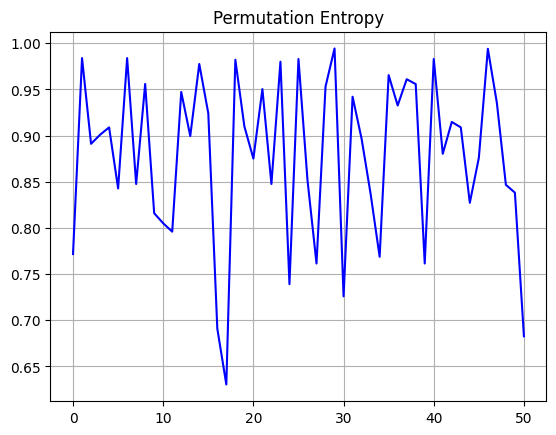

In [ ]:
plt.plot(df_result['Permutation Entropy'],color='blue')
plt.grid(True)
plt.title('Permutation Entropy')

Calculates the moving average of the permutation entropy values stored in the 'Permutation Entropy' column of the DataFrame 'df_result' using a window size of 5, then plots the smoothed curve with a blue line, and adds gridlines and a title to the plot.

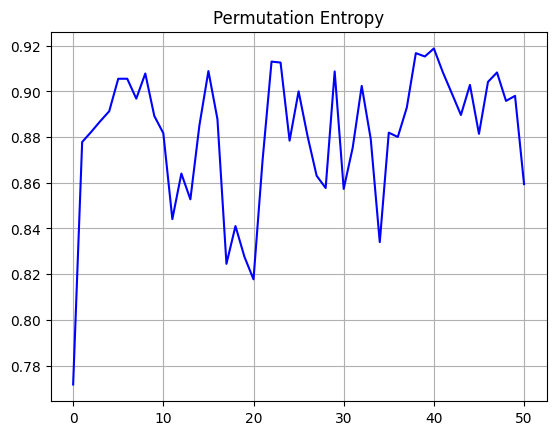

In [ ]:
#smoothening the graph
df_ma['Permutation Entropy MA']= df_result['Permutation Entropy'].rolling(window=5, min_periods=1).mean()
plt.plot(df_ma['Permutation Entropy MA'],color='blue')
plt.grid(True)
plt.title('Permutation Entropy')
plt.show()

Creating a new column 'Intoxicated' in the DataFrame 'df_result', where values greater than or equal to 0.08 are labeled as 'intoxicated' (1), and values less than 0.08 are labeled as 'sober' (0), based on the 'TAC Value'.

In [ ]:
df_result['Intoxicated'] = (df_result['TAC Value'] >= 0.08).astype(int)
df_result

,TAC Value,Permutation Entropy,Complexity,Intoxicated
0,0.041689,0.771728,0.209204,0
1,0.046559,0.983933,0.266730,0
2,0.050424,0.891094,0.241562,0
3,0.065357,0.900914,0.245912,0
4,0.065953,0.908864,0.246379,0
5,0.067269,0.842791,0.228468,0
6,0.076462,0.983933,0.266730,0
7,0.080588,0.847557,0.229760,1
8,0.085197,0.955915,0.259134,1
9,0.089122,0.815938,0.224308,1


Merging two DataFrames, 'df_acc' and 'df_clean', on the columns 'timestamp' and 'pid', retaining only the rows that have matching values in both DataFrames, then creates a new column 'Intoxicated' in the resulting DataFrame 'df_total', where values greater than or equal to 0.08 in the 'TAC_Reading' column are labeled as 'intoxicated' (1), and values less than 0.08 are labeled as 'sober' (0).

In [ ]:
df_total = pd.merge(df_acc,df_clean,on=['timestamp','pid'],how='inner')
df_total['Intoxicated'] = (df_total['TAC_Reading'] >= 0.08).astype(int)
df_total

,time,pid,x,y,z,phonetype,timestamp,TAC_Reading,Intoxicated
0,1493740607011,JB3156,1.829285,10.341198,10.899044,Android,1493740607,0.035549,0
1,1493740607031,JB3156,1.981330,9.302634,10.169534,Android,1493740607,0.035549,0
2,1493740607051,JB3156,1.193751,6.882037,8.002905,Android,1493740607,0.035549,0
3,1493740607071,JB3156,1.087926,3.531353,10.245369,Android,1493740607,0.035549,0
4,1493740607091,JB3156,-0.092390,3.977956,13.346973,Android,1493740607,0.035549,0
...,...,...,...,...,...,...,...,...,...
6142,1493804161897,DK3500,0.000000,0.000900,0.005800,iPhone,1493804161,0.011943,0
6143,1493804161923,DK3500,0.000800,-0.000000,0.005400,iPhone,1493804161,0.011943,0
6144,1493804161948,DK3500,-0.000200,0.000600,0.005600,iPhone,1493804161,0.011943,0
6145,1493804161973,DK3500,-0.000700,0.000200,0.005900,iPhone,1493804161,0.011943,0


##Predicting the person is intoxicated or not


This code splits the data into training and testing sets, trains a Decision Tree Classifier model on the training data, predicts the labels for the test data, computes the accuracy of the model's predictions, and prints the accuracy score.








In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df_test[['x','y','z']]
y = df_test['Intoxicated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7317073170731707


Calculating the correlation matrix for the columns 'Permutation Entropy', 'Complexity', and 'TAC Value' in the DataFrame 'df_result'. In which we can observe that for permutation entropy and complexity are more correlated.

In [ ]:
corre_matrix = df_result[['Permutation Entropy','Complexity','TAC Value']].corr()
corre_matrix

,Permutation Entropy,Complexity,TAC Value
Permutation Entropy,1.000000,0.998930,-0.080941
Complexity,0.998930,1.000000,-0.067459
TAC Value,-0.080941,-0.067459,1.000000


Creating a scatter plot where the x-axis represents the 'Permutation Entropy', the y-axis represents the 'Complexity', and the points are colored based on whether the corresponding data points in the DataFrame 'df_result' are labeled as 'intoxicated' or 'sober' in the 'Intoxicated' column. 1 represents intoxicated and 0 represents sober.

<Axes: xlabel='Permutation Entropy', ylabel='Complexity'>

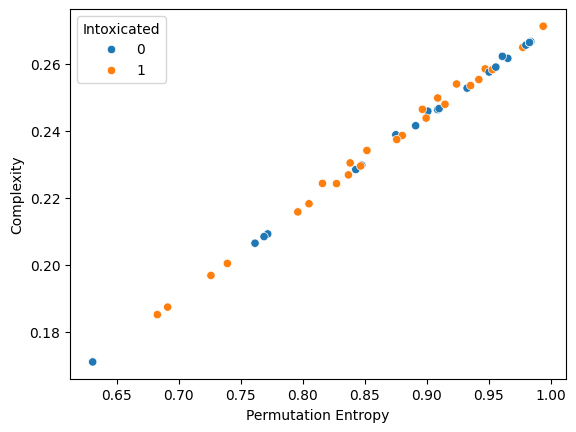

In [ ]:
import seaborn as sns
sns.scatterplot(x='Permutation Entropy', y='Complexity', hue=df_result['Intoxicated'], data=df_result)

The scatter plot shows the relationship between Permutation Entropy and Complexity, with data points colored based on intoxication status: blue for non-intoxicated (0) and orange for intoxicated (1). The plot reveals a strong positive correlation between Permutation Entropy and Complexity, as the data points form a linear pattern. Both intoxicated and non-intoxicated data points follow this trend closely, indicating that regardless of intoxication status, higher Permutation Entropy is consistently associated with higher Complexity.

##Conclusion

The correlation matrix highlights a notable association between permutation entropy and complexity, indicating a strong linear relationship. This is further evidenced by the scatter plot, where both variables exhibit a clear linear increase, suggesting their interdependence. Our predictive model successfully determined whether individuals were intoxicated with a 73% accuracy rate, relying on a threshold of 0.08 for TAC readings: individuals with TAC readings exceeding 0.08 were classified as intoxicated, while those below 0.08 were classified as sober.